## loading modules

In [46]:
import pandas as pd
import numpy as np
from scipy.stats import bernoulli
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

## loading data frame and removing NaN values

In [47]:
df = pd.read_csv('content/2016-general-election-trump-vs-clinton.csv')
df = df.dropna(subset=['Number of Observations'])

## Question 1:
$$
\hat{p} = \frac{1}{N} \sum_{i=1}^{N} X_i
$$

we need to calculatte p hat and SE to find the confidence interval

$$
SE = \sqrt{\frac{p(1-p)}{N}}
$$

Since p is unknown, we use p hat to estimate it:

$$
SE \approx \sqrt{\frac{\hat{p}(1-\hat{p})}{N}}
$$


A 95% confidence interval for p is constructed as:

$$
\text{CI} = \hat{p} \pm z \times SE
$$


 where z is the standarlized normal value. for 95% interval z=1.96(z-score of 0.975)<br>
 and the formula for CI is:
$$
\text{CI} = \hat{p} \pm 1.96 \times \sqrt{\frac{\hat{p}(1-\hat{p})}{N}}
$$





In [48]:
p_trump = df["Trump"] / 100
p_clinton = df["Clinton"] / 100


SE_trump = np.sqrt(p_trump * (1 - p_trump) / df["Number of Observations"])
SE_clinton = np.sqrt(p_clinton * (1 - p_clinton) / df["Number of Observations"])

CI_trump=[]
CI_clinton=[]
for pt,pc,ptse,pcse in zip(p_trump,p_clinton,SE_trump,SE_clinton):
    CI_trump.append((pt - 1.96 * ptse, pt + 1.96 * ptse))
    CI_clinton.append((pc - 1.96 * pcse, pc + 1.96 * pcse))

## Question 2:
a monte carlo simulation was conducted. the results show that about 93 percent of time p was indeed in the confidence interval (which is close to the expected result which is 95%)

In [49]:
p=0.47
N= 30
iters=10**5

confidence_interval=0

for _ in range(iters):
    sample = bernoulli.rvs(p, size=N)
    p_hat=sum(sample)/30
    SE = 1.96*np.sqrt(p_hat*(1-p_hat)/N)
    CI = (p_hat-SE,p_hat+SE)
    if CI[0]<=p<=CI[1]:
        confidence_interval+=1



print(confidence_interval/iters)

    

0.93153


## Question 3:

In [50]:

df_cleaned =df[['Trump', 'Clinton', 'Pollster', 'Start Date', 
'Number of Observations','Mode']]




print(df_cleaned)

      Trump  Clinton          Pollster  Start Date  Number of Observations  \
0      41.0     45.0     Insights West  2016-11-04                   940.0   
4      43.0     41.0          IBD/TIPP  2016-11-04                  1107.0   
5      41.0     45.0  YouGov/Economist  2016-11-04                  3669.0   
6       6.0     90.0  YouGov/Economist  2016-11-04                  1392.0   
7      84.0      4.0  YouGov/Economist  2016-11-04                  1110.0   
...     ...      ...               ...         ...                     ...   
1516   65.0     12.0  YouGov/Economist  2015-06-20                   235.0   
1517   34.0     45.0  YouGov/Economist  2015-06-20                   266.0   
1518   32.0     50.0        Quinnipiac  2015-05-19                  1711.0   
1519    5.0     89.0        Quinnipiac  2015-05-19                   748.0   
1520   68.0      9.0        Quinnipiac  2015-05-19                   679.0   

            Mode  
0       Internet  
4     Live Phone  
5     

## Question 4:
data was grouped by its date and number of voters of each party were added up and divided by the total number of voters in that day

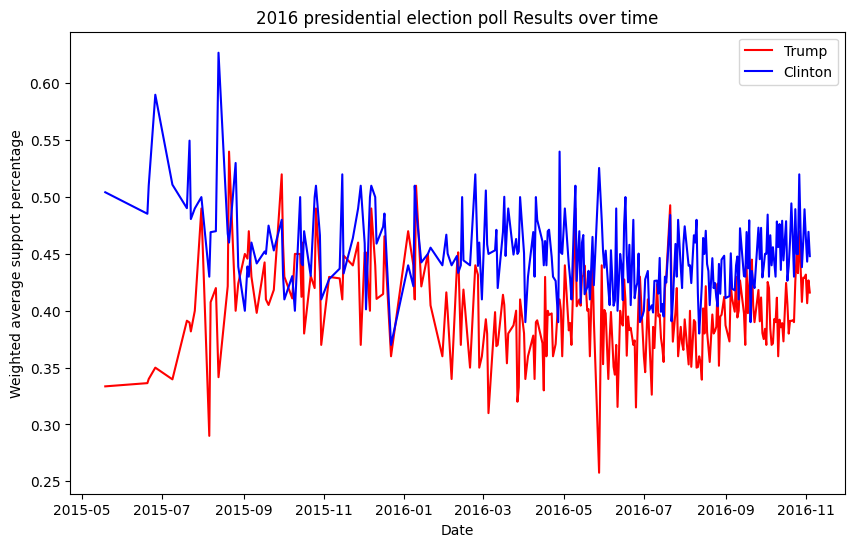

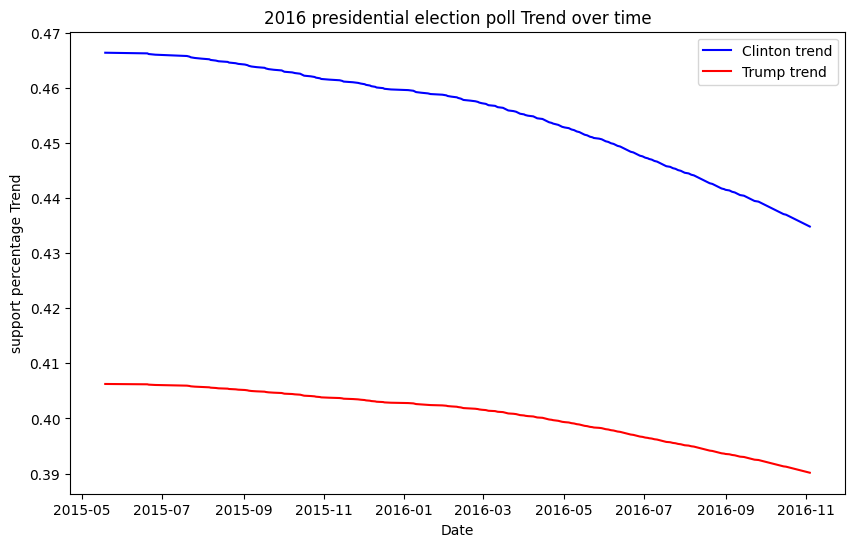

In [57]:
plt.figure(figsize=(10, 6))

df_cleaned.loc[:, 'Start Date'] = pd.to_datetime(df['Start Date'])
df_cleaned.loc[:,'Number of Trump supporters'] = df["Trump"]*df['Number of Observations']/100
df_cleaned.loc[:,'Number of Clinton supporters'] = df["Clinton"]*df['Number of Observations']/100


grouped_data = df_cleaned.groupby("Start Date").agg(
    total_observations=("Number of Observations", "sum"),
    total_trump_supporters=("Number of Trump supporters", "sum"),
    total_clinton_supporters=("Number of Clinton supporters", "sum")
)

grouped_data["Trump average percentage"] = grouped_data["total_trump_supporters"]/grouped_data["total_observations"]

grouped_data["Clinton average percentage"] = grouped_data["total_clinton_supporters"]/grouped_data["total_observations"]

grouped_data = grouped_data.reset_index()

sns.lineplot(x="Start Date", y="Trump average percentage", data=grouped_data, color="red", label="Trump")

sns.lineplot(x="Start Date", y="Clinton average percentage", data=grouped_data, color="blue", label="Clinton")

plt.xlabel("Date")
plt.ylabel("Weighted average support percentage")
plt.title("2016 presidential election poll Results over time")
plt.legend()
plt.show()






x = np.arange(len(grouped_data["Clinton average percentage"]))  
y = grouped_data["Clinton average percentage"]
coefficients = np.polyfit(x, y, deg=1)  
trend_line = np.polyval(coefficients, x)  


x1 = np.arange(len(grouped_data["Trump average percentage"]))  
y1 = grouped_data["Trump average percentage"]
coefficients = np.polyfit(x1, y1, deg=1)  
trend_line1 = np.polyval(coefficients, x1)  

plt.figure(figsize=(10, 6))

plt.plot(grouped_data["Start Date"], trend_line, label=f'Clinton trend', color='blue')
plt.plot(grouped_data["Start Date"], trend_line1, label=f'Trump trend', color='red')

plt.xlabel('Date')
plt.ylabel('support percentage Trend')
plt.title('2016 presidential election poll Trend over time')
plt.legend()
plt.show()

## Question 5:

In [52]:
total_voters = df["Number of Observations"].sum()
print(f"total of number of voters: {total_voters:.0f}")

total of number of voters: 1940931


## Question 6:

In [53]:

total_trump = (df_cleaned["Trump"] * df_cleaned["Number of Observations"] / 100).sum()
total_clinton = (df_cleaned["Clinton"] * df_cleaned["Number of Observations"] / 100).sum()

print(f"Total number of  votes for Trump: {total_trump:.0f}")
print(f"Total number of votes for Clinton: {total_clinton:.0f}")

Total number of  votes for Trump: 787695
Total number of votes for Clinton: 885299


## Question 7:
the confidence interval for aggregated data is calculated using the formula in question 1.

In [54]:

p_trump = total_trump / total_voters
p_clinton = total_clinton / total_voters


SE_trump = np.sqrt(p_trump * (1 - p_trump) / total_voters)
SE_clinton = np.sqrt(p_clinton * (1 - p_clinton) / total_voters)

CI_trump = (p_trump - 1.96 * SE_trump, p_trump + 1.96 * SE_trump)
CI_clinton = (p_clinton - 1.96 * SE_clinton, p_clinton + 1.96 * SE_clinton)

print(f"Confidence interval for Trump: {CI_trump}")
print(f"Confidence interval for Clinton: {CI_clinton}")

Confidence interval for Trump: (0.40514270334189684, 0.4065243883785197)
Confidence interval for Clinton: (0.4554200938173629, 0.4568215263123584)


## Question 8:
**a:** confidence interval of d was calculated using the given formula. <br>

In [55]:

d=2*p_clinton-1
SE_d = 2*SE_clinton
CI_spread= (d-1.96*SE_d,d+1.96*2*SE_d)
print(f"the estimated spread is {d}")
print(f"Confidence interval for spread is {CI_spread}")

the estimated spread is -0.08775837987027868
Confidence interval for spread is (-0.08915981236527412, -0.08495551488028778)


**b:**
#### **Hypotheses**:
we use z score test because the sample is large enough
H0: d=0 <br>
if d is zero  it means there isnt much difference between these two parties in terms of numbers of supporters meaning no one is winning easily. 

**Spread**:
$$
d = 2\hat{p} - 1
$$

$$
\text{SE}_p = \sqrt{\frac{\hat{p}(1 - \hat{p})}{N}}
$$
$$
\text{SE}_d = 2 \cdot \text{SE}_p
$$

**Test Statistic**: <br>
$$
z = \frac{d-\text{d}_{H_0}}{\text{SE}_d} = \frac{d}{\text{SE}_d}
$$

**p-value**: <br>
$$p\text{-value} = P(Z > |z|)+ P(Z < -|z|)=2 \cdot P(Z > |z|)=2 \cdot P(Z < -|z|)$$
since this is a two tailed test 2*P(Z > |z|) is calculated(chance of observing two tail of normal distribution). also if the p-value is larger than alpha(5% in this case) we fail to reject H0 otherwise we reject H0 

In [ ]:
alpha = 0.05
z= d/SE_d
p_value=2*norm.cdf(-1*abs(z))
if(p_value<alpha):
    print("null hypotheses is rejected meaning there is a significant difference between two parties.")
else:
    print("failed to reject H0,meaning we are unsure if there is an actual difference between the two parties or not.")


null hypotheses is rejected meaning there is a significant difference between two parties
